# MACHINE LEARNING LAB - BCSE209P
# Assessment 2
## Submitted by - Ishanvi Kotha (21BCE2712)
-------------------------------------------------------------------------------------------------------------------------------------------------

### Perform the comparative analysis of supervised learning algorithms - 
### 1. Linear Regression
### 2. Naïve bayes classifier
### 3. Decision tree
### 4. KNN classifier
### 5. Logistic regression

------------------------------------------------------------------------

## We will be using the titanic dataset which predicts how many passengers survived based on age, gender, class etc

---------------------------------------------------------------------------------------------------------------

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

## 2. Importing dataset

In [2]:
df = pd.read_csv("titanic.csv")

## 3. Data preprocessing

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
print(df.shape)

(891, 12)


In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

There are null values in "age" and "cabin" and "embarked" in the dataset

We will remove the "cabin" column as it is not necessary

In [9]:
df = df.drop("Cabin", axis=1)

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [12]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

0 denotes that the person did not survive and 1 denotes that the person survived

## 4. Data visualization

In [13]:
corr = df.corr(numeric_only = True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

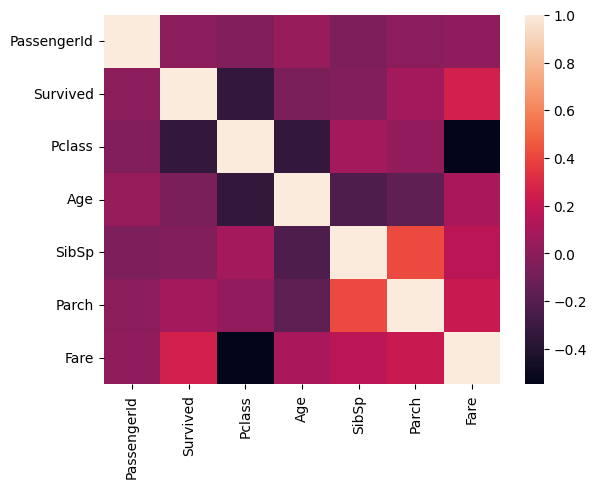

In [14]:
sns.heatmap(corr)

<Axes: ylabel='count'>

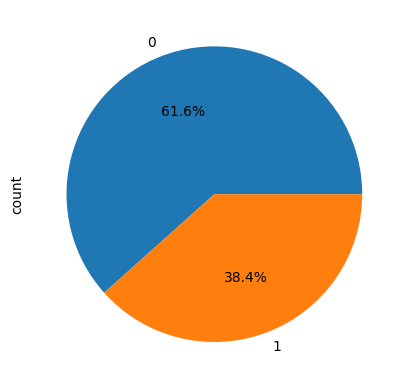

In [15]:
df.Survived.value_counts().plot(kind="pie", autopct="%1.1f%%")

The data type of "sex" and "embarked" column is string hence we need to encode them to train the model 

## 5. Encoding

In [16]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

## 6. Splitting into dependent and independent variable

In [17]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

## 7. Splitting into test and train dataset

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 8. Scaling

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 9. Model building & Evaluation metrics

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Regression': LinearRegression()  
}

for name, model in models.items():
    
    model.fit(x_train_scaled, y_train)
    
    # Regression model
    if name == 'Linear Regression':
        y_val_pred = model.predict(x_test_scaled)
        
        # Print regression metrics
        print(f"{name} -")
        print(f"MSE: {mean_squared_error(y_test, y_val_pred)}")
        print(f"MAE: {mean_absolute_error(y_test, y_val_pred)}")
        print(f"R2 Score: {r2_score(y_test, y_val_pred)}")
        
    # Classification model    
    else:
        y_val_pred = model.predict(x_test_scaled)
        
        # Print classification metrics
        print(f"{name} -")
        print(f"Accuracy: {accuracy_score(y_test, y_val_pred)}")
        print(f"Classification Report:\n{classification_report(y_test, y_val_pred)}")

Logistic Regression -
Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Decision Tree -
Accuracy: 0.7653631284916201
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.70      0.77      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179

KNN -
Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73    